In [1]:
import pandas as pd

In [14]:
df=pd.read_csv(r"C:\Users\Smile\Downloads\spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

***#convert categorical data to numerical***

In [17]:
from sklearn.preprocessing import LabelEncoder

In [21]:
l_category=LabelEncoder()

In [22]:
df['new_category']=l_category.fit_transform(df['Category'])

In [23]:
df

,Category,Message,new_category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [24]:
x=df['Message']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [25]:
y=df['new_category']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: new_category, Length: 5572, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [28]:
X_train


2647    Em, its olowoyey@ usc.edu have a great time in...
1810                Aight, I'll ask a few of my roommates
3066                          Sounds good, keep me posted
3856    Free msg: Single? Find a partner in your area!...
1466    YOU 07801543489 are guaranteed the latests Nok...
                              ...                        
2958    I would but I'm still cozy. And exhausted from...
1774            I'm not coming over, do whatever you want
1633    Hello my little party animal! I just thought I...
1623    U have a secret admirer who is looking 2 make ...
947     Ur cash-balance is currently 500 pounds - to m...
Name: Message, Length: 4457, dtype: object

In [29]:
y_train

2647    0
1810    0
3066    0
3856    1
1466    1
       ..
2958    0
1774    0
1633    0
1623    1
947     1
Name: new_category, Length: 4457, dtype: int32

In [30]:
X_test

4182            Ok da, i already planned. I wil pick you.
3509    Camera quite good, 10.1mega pixels, 3optical a...
2919                        Thanks chikku..:-) gud nyt:-*
2243    Nope wif my sis lor... Aft bathing my dog then...
3689                           I'll meet you in the lobby
                              ...                        
2072         Good night my dear.. Sleepwell&amp;Take care
3453                             Ugh just got outta class
3774    I came hostel. I m going to sleep. Plz call me...
943     How about getting in touch with folks waiting ...
4960    What i mean was i left too early to check, cos...
Name: Message, Length: 1115, dtype: object

In [31]:
y_test

4182    0
3509    0
2919    0
2243    0
3689    0
       ..
2072    0
3453    0
3774    0
943     1
4960    0
Name: new_category, Length: 1115, dtype: int32

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vectorizer=CountVectorizer()

In [37]:
X_train_vector=vectorizer.fit_transform(X_train)

In [39]:
features_names=vectorizer.get_feature_names_out()
features_names

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

Model Prediction

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
M_model=MultinomialNB()

In [44]:
M_model.fit(X_train_vector,y_train)

MultinomialNB()

In [45]:
X_test_vector=vectorizer.transform(X_test)

In [68]:
accuracy=M_model.score(X_test_vector,y_test)
accuracy

0.9820627802690582

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 98.21%


In [48]:
y_pred=M_model.predict(X_test_vector)

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,

In [50]:
cm=confusion_matrix(y_test,y_pred)
cm


array([[960,   6],
       [ 14, 135]], dtype=int64)

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

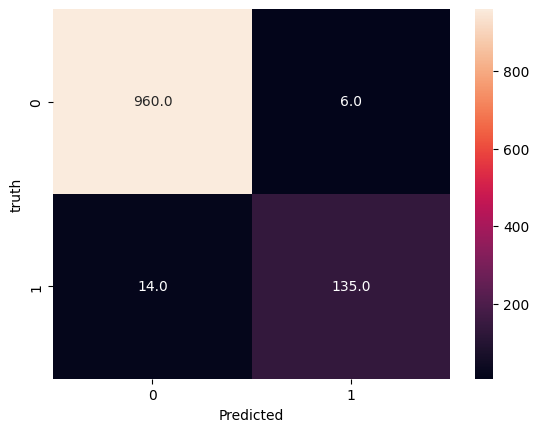

In [53]:
sns.heatmap(cm,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('truth')
plt.show()

In [60]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.91      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [55]:
import joblib

In [57]:
joblib.dump(M_model,'mail_model.joblib')


['mail_model.joblib']

In [58]:
joblib.dump(vectorizer,'Vectorizer.joblib')

['Vectorizer.joblib']

Model Accuracy: 98.21%
